In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [10]:
df = pd.read_csv(r'C:\Users\r.vardhan.reddy\Desktop\Data\titanic.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [16]:
x = df.iloc[:,1:3]

In [17]:
y=df.iloc[:,0]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

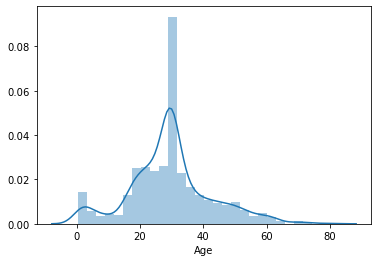

In [21]:
sns.distplot(x_train['Age'])

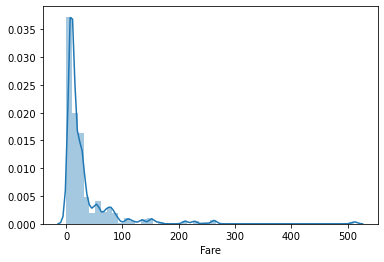

In [25]:
sns.distplot(x_train['Fare'])

In [24]:
df.skew()

Survived    0.478523
Age         0.434488
Fare        4.787317
dtype: float64

## QQ-Plot

Text(0.5, 1.0, 'QQ-plot')

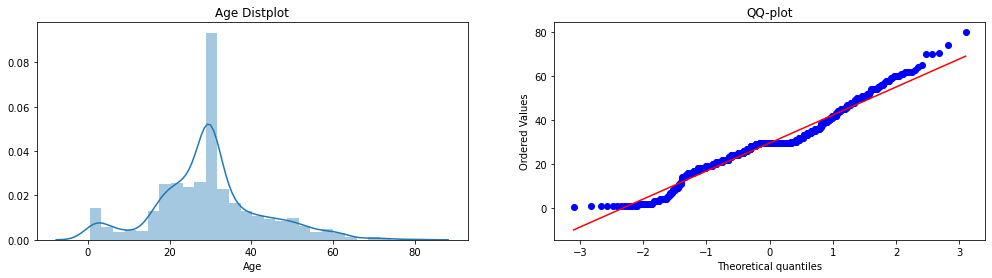

In [31]:
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.distplot(x_train['Age'])
plt.title('Age Distplot')
plt.subplot(1,2,2)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title("QQ-plot")

Text(0.5, 1.0, 'QQ-plot')

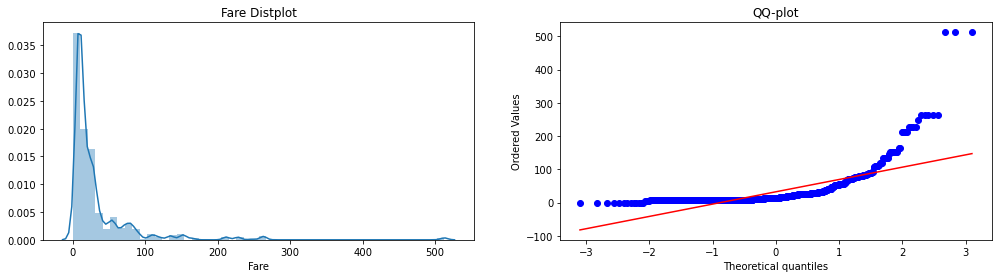

In [33]:
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.distplot(x_train['Fare'])
plt.title('Fare Distplot')
plt.subplot(1,2,2)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title("QQ-plot")

In [34]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()

In [35]:
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred1 = lr.predict(x_test)
y_pred2 = dt.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred1)

0.6480446927374302

In [41]:
accuracy_score(y_test,y_pred2)

0.6871508379888268

In [42]:
trf = FunctionTransformer(func = np.log1p)

In [43]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed   = trf.transform(x_test)

Text(0.5, 1.0, 'QQ-plot')

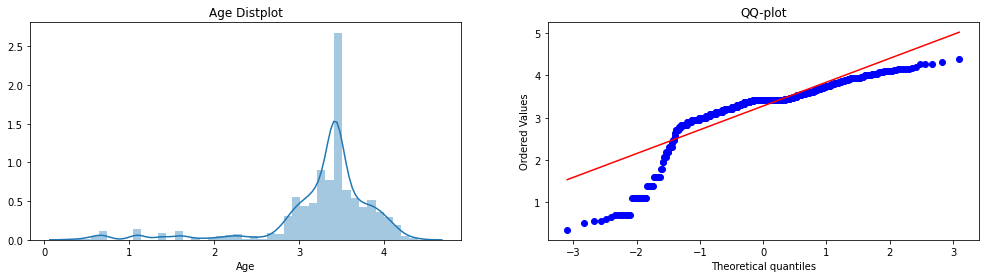

In [45]:
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.distplot(x_train_transformed['Age'])
plt.title('Age Distplot')
plt.subplot(1,2,2)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title("QQ-plot")

Text(0.5, 1.0, 'QQ-plot')

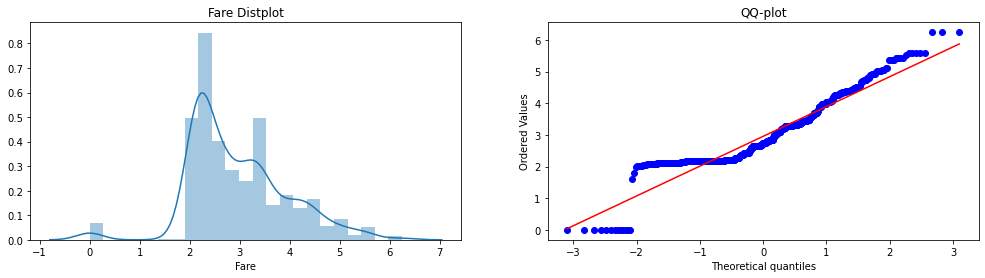

In [46]:
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.distplot(x_train_transformed['Fare'])
plt.title('Fare Distplot')
plt.subplot(1,2,2)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title("QQ-plot")

In [50]:
lr.fit(x_train_transformed,y_train)
dt.fit(x_train_transformed,y_train)
y_pred1 = lr.predict(x_test_transformed)
y_pred2 = dt.predict(x_test_transformed)

In [51]:
accuracy_score(y_test,y_pred2)

0.6703910614525139

In [52]:
accuracy_score(y_test,y_pred1)

0.6815642458100558

In [55]:
trf2 = ColumnTransformer([
 ('log',FunctionTransformer(func = np.log1p),['Fare'])],remainder='passthrough')

In [56]:
x_train_transformed2 = trf2.fit_transform(x_train_transformed)

In [57]:
x_test_transformed2 = trf2.transform(x_test_transformed)

In [58]:
lr.fit(x_train_transformed2,y_train)
dt.fit(x_train_transformed2,y_train)
y_pred1 = lr.predict(x_test_transformed2)
y_pred2 = dt.predict(x_test_transformed2)

In [59]:
accuracy_score(y_test,y_pred1)

0.6815642458100558

In [60]:
accuracy_score(y_test,y_pred2)

0.6871508379888268

In [67]:
def apply_transform(transform):
    x = df.iloc[:,1:3]
    y=df.iloc[:,0]
    trf = ColumnTransformer([
      ('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans = trf.fit_transform(x)
    lr = LogisticRegression()
    print("Acuracy",np.mean(cross_val_score(lr,x_trans,y,scoring='accuracy',cv=10)))
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    stats.probplot(x['Fare'],dist='norm',plot=plt)
    plt.title("before_transform")
    plt.subplot(1,2,2)
    stats.probplot(x_trans[:,0],dist='norm',plot=plt)
    plt.title("After_transform")

Acuracy 0.6589013732833957


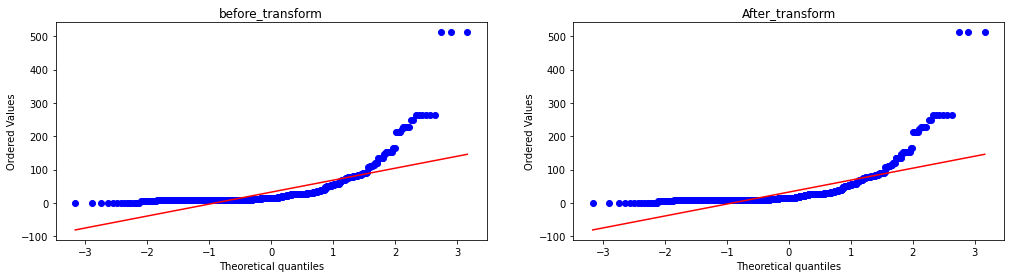

In [68]:
apply_transform(lambda x:x)

Acuracy 0.6442446941323345


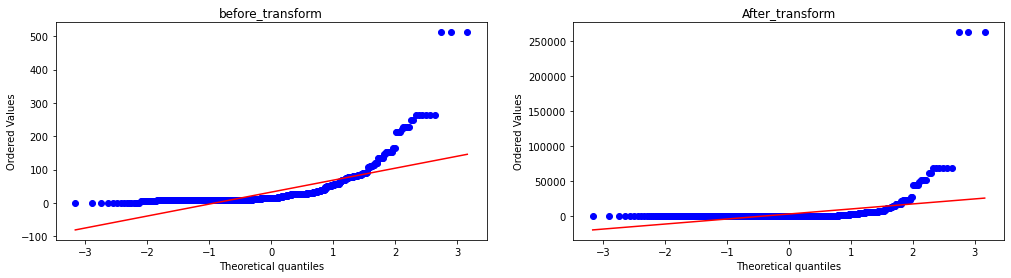

In [70]:
apply_transform(lambda x:x**2)

Acuracy 0.39843945068664166


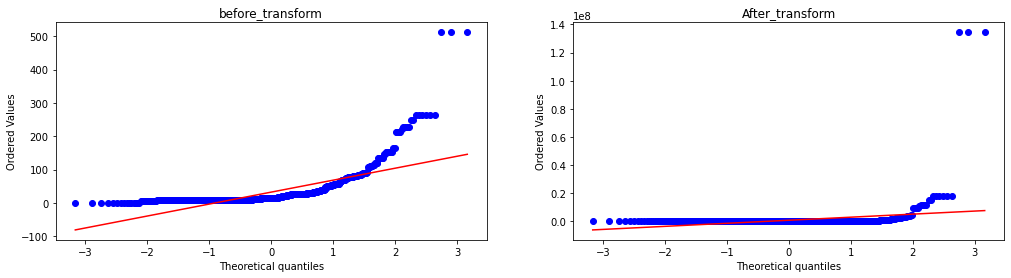

In [71]:
apply_transform(lambda x:x**3)

Acuracy 0.6589013732833957


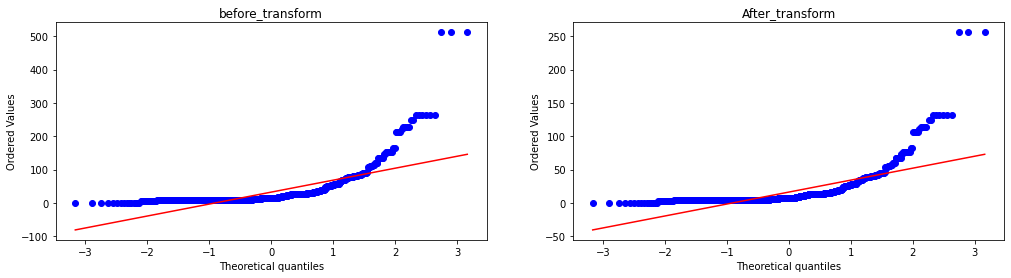

In [72]:
apply_transform(lambda x:x**1/2)

Acuracy 0.61729088639201


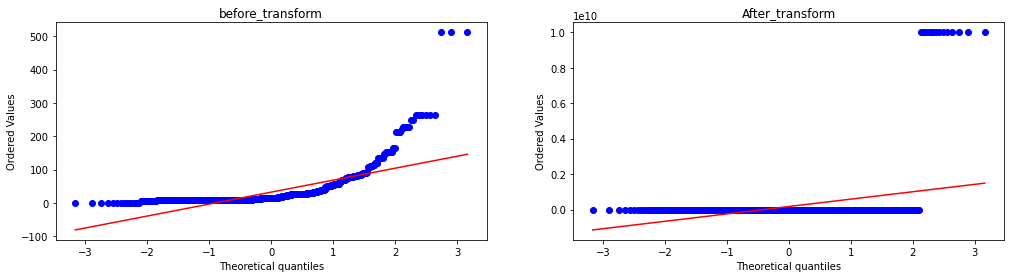

In [75]:
apply_transform(lambda x:1/(x+0.0000000001))

Acuracy 0.6195131086142323


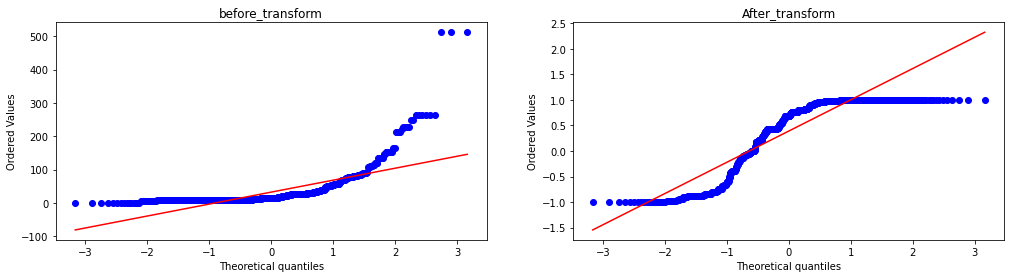

In [77]:
apply_transform(np.sin)

Acuracy 0.6712609238451936


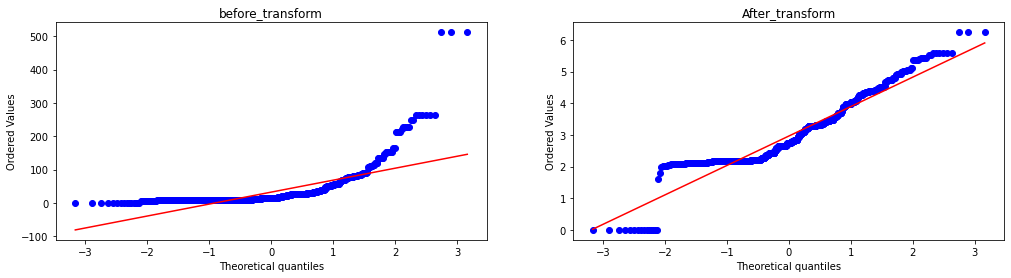

In [79]:
apply_transform(np.log1p)